In [1]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the File

df = pd.read_csv("C:/Users/DELL/Desktop/Project/P78 -- Bankruptcy Prevention/bankruptcy.csv",delimiter=';')
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk       class  
0               0.0              0.5  bankruptcy  
1               0.0              1.0  bankruptcy  
2               0.0              1.0  bankruptcy  
3               0.0              1.0  bankruptcy  
4               0.0              1.0  bankruptcy

In [3]:
# Checking Dataset - for Null Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [4]:
#Encoding Categorical variable to Numbers

labelencoder = LabelEncoder()
df.iloc[:, -1] = labelencoder.fit_transform(df.iloc[:,-1])
df.head()

industrial_risk   management_risk   financial_flexibility   credibility  \
0              0.5               1.0                     0.0           0.0   
1              0.0               1.0                     0.0           0.0   
2              1.0               0.0                     0.0           0.0   
3              0.5               0.0                     0.0           0.5   
4              1.0               1.0                     0.0           0.0   

    competitiveness   operating_risk   class  
0               0.0              0.5       0  
1               0.0              1.0       0  
2               0.0              1.0       0  
3               0.0              1.0       0  
4               0.0              1.0       0

In [5]:
# Correlation Analysis

df.corr()

industrial_risk   management_risk  \
industrial_risk                1.000000          0.255127   
 management_risk               0.255127          1.000000   
 financial_flexibility        -0.162624         -0.254845   
 credibility                  -0.014438         -0.303341   
 competitiveness              -0.257814         -0.306568   
 operating_risk                0.144507          0.213874   
 class                        -0.227823         -0.370838   

                         financial_flexibility   credibility  \
industrial_risk                      -0.162624     -0.014438   
 management_risk                     -0.254845     -0.303341   
 financial_flexibility                1.000000      0.524951   
 credibility                          0.524951      1.000000   
 competitiveness                      0.686612      0.675689   
 operating_risk                      -0.116903     -0.288458   
 class                                0.751020      0.755909   

                         competitiveness   operating_risk     class  
industrial_risk                -0.257814         0.144507 -0.227823  
 management_risk               -0.306568         0.213874 -0.370838  
 financial_flexibility          0.686612        -0.116903  0.751020  
 credibility                    0.675689        -0.288458  0.755909  
 competitiveness                1.000000        -0.211383  0.899452  
 operating_risk                -0.211383         1.000000 -0.279786  
 class                          0.899452        -0.279786  1.000000

In [6]:
# Checking Duplicate Values

df[df.duplicated()].shape

(147, 7)

In [7]:
df.nunique()

industrial_risk           3
 management_risk          3
 financial_flexibility    3
 credibility              3
 competitiveness          3
 operating_risk           3
 class                    2
dtype: int64

In [8]:
# Changing Column Names

df1=df.rename({" management_risk":"management_risk"," financial_flexibility":"financial_flexibility"," credibility":"credibility"," competitiveness":"competitiveness"," operating_risk":"operating_risk"," class":"Target"},axis=1)
df1.head()

industrial_risk  management_risk  financial_flexibility  credibility  \
0              0.5              1.0                    0.0          0.0   
1              0.0              1.0                    0.0          0.0   
2              1.0              0.0                    0.0          0.0   
3              0.5              0.0                    0.0          0.5   
4              1.0              1.0                    0.0          0.0   

   competitiveness  operating_risk  Target  
0              0.0             0.5       0  
1              0.0             1.0       0  
2              0.0             1.0       0  
3              0.0             1.0       0  
4              0.0             1.0       0

In [9]:
x = df1[['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']]
y = df1[['Target']]

<AxesSubplot:>

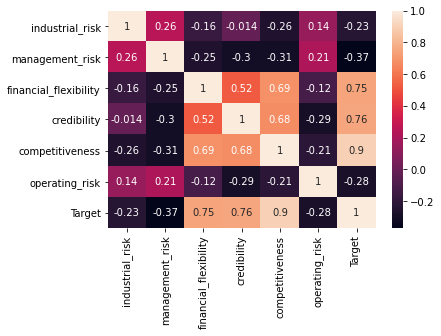

In [10]:
# Checking Correlation

correlation = df1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [11]:
# Checking Target class distribution

y.value_counts()

Target
1         143
0         107
dtype: int64

NumExpr defaulting to 8 threads.


<AxesSubplot:ylabel='None'>

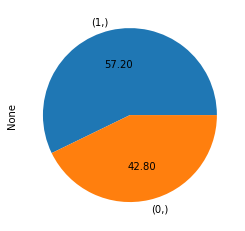

In [12]:
# Pie Plot Visual

y.value_counts().plot.pie(autopct='%.2f')

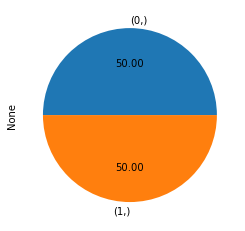

In [13]:
# Making Data Balance
# Random Under Sampling to make Balance Data

x = df1.drop(['Target'],axis=1)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy = 1) # In range 0 & 1 
x_rus,y_rus = rus.fit_resample(x,y)
                         
ax = y_rus.value_counts().plot.pie(autopct='%.2f')

In [14]:
y_rus.value_counts()

Target
0         107
1         107
dtype: int64

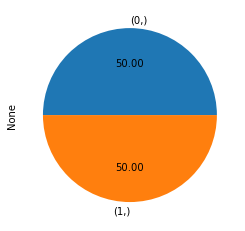

In [15]:
# Random Over Sampling to make Balance Data

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy =1)
x_ros,y_ros = ros.fit_resample(x,y)
                         
ax = y_ros.value_counts().plot.pie(autopct='%.2f')

In [16]:
y_ros.value_counts()

Target
0         143
1         143
dtype: int64

In [17]:
# Using SMOTE
sm = SMOTE(random_state = 42)
x_sm,y_sm = sm.fit_resample(x,y)

In [18]:
y_sm.value_counts()

Target
0         143
1         143
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1,stratify = y)

In [20]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((200, 6), (200, 1), (50, 6), (50, 1))

# RBF 

In [21]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[100,50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001] }]
model = GridSearchCV(clf,param_grid,cv=10)
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [100, 50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [22]:
model.best_params_ , model.best_score_

({'C': 50, 'gamma': 0.5, 'kernel': 'rbf'}, 1.0)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
clf = SVC(C= 50, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.0


array([[20,  1],
       [ 0, 29]], dtype=int64)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Linear 

In [25]:
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[100,50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001] }]
model = GridSearchCV(clf,param_grid,cv=10)
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [100, 50, 5, 10, 0.5],
                          'kernel': ['linear']}])

In [26]:
model.best_params_ , model.best_score_

({'C': 50, 'gamma': 100, 'kernel': 'linear'}, 1.0)

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
clf = SVC(C= 50, gamma = 100)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.0


array([[20,  1],
       [ 0, 29]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Polynomial

In [29]:
clf = SVC()
param_grid = [{'kernel':['poly'],'gamma':[100,50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001] }]
model = GridSearchCV(clf,param_grid,cv=10)
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [100, 50, 5, 10, 0.5], 'kernel': ['poly']}])

In [30]:
model.best_params_ , model.best_score_

({'C': 50, 'gamma': 100, 'kernel': 'poly'}, 0.9800000000000001)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
clf = SVC(C= 50, gamma = 100)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.0


array([[20,  1],
       [ 0, 29]], dtype=int64)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Sigmoid

In [33]:
clf = SVC()
param_grid = [{'kernel':['sigmoid'],'gamma':[100,50,5,10,0.5],'C':[50,15,14,13,12,11,10,0.1,0.001] }]
model = GridSearchCV(clf,param_grid,cv=10)
model.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [50, 15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [100, 50, 5, 10, 0.5],
                          'kernel': ['sigmoid']}])

In [34]:
model.best_params_ , model.best_score_

({'C': 0.1, 'gamma': 0.5, 'kernel': 'sigmoid'}, 0.9450000000000001)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
clf = SVC(C= 0.1, gamma = 0.5)
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.0


array([[20,  1],
       [ 0, 29]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Random Forest - entropy

In [58]:
x1 = df1[['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']]
y1 = df1[['Target']]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=1,stratify = y1)

from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(bootstrap = True,
 max_depth = 2,
 max_features ='auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 25, 
 criterion = "entropy",
 random_state=2)

model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)
acc = accuracy_score(y1_test,y1_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y1_pred)

Accuracy = 100.0


array([[21,  0],
       [ 0, 29]], dtype=int64)

In [38]:
model.score(x1_train,y1_train)

0.94

In [39]:
model.score(x1_test,y1_test)

0.9

In [40]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        29

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Gini

In [51]:

model2 = RandomForestClassifier(n_jobs = 3,n_estimators =2, oob_score = True, criterion = "gini",max_depth=3,random_state=5,max_features=6)
model2.fit(x1_train,y1_train)
y1_pred = model2.predict(x1_test)
acc = accuracy_score(y1_test,y1_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y1_test, y1_pred)

Accuracy = 100.0


array([[21,  0],
       [ 0, 29]], dtype=int64)

In [52]:
model.score(x1_train,y1_train)

0.94

In [53]:
model.score(x1_test,y1_test)

0.9

In [44]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.97      1.00      0.98        29

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [45]:
# say New data for prediction is
new_data=pd.DataFrame({'industrial_risk':0,"management_risk":1,"financial_flexibility":1,"credibility":1,"competitiveness":0,"operating_ris":0},index=[0])
new_data

industrial_risk  management_risk  financial_flexibility  credibility  \
0                0                1                      1            1   

   competitiveness  operating_ris  
0                0              0

In [46]:
# Manual Prediction of Price
model.predict(new_data)

array([1])

In [47]:
# create pickle file using seialization
import pickle
pickle_out = open('clf.pkl','wb')
pickle.dump(clf,pickle_out)
pickle_out.close()

In [48]:
clf.predict([[0,0,1,1,0,0]])

array([1])

In [49]:
model.score(x_train,y_train)

0.94

In [50]:
model.score(x_test,y_test)

0.9